In [1]:
import sympy as sp

In [2]:
r = sp.symbols('r', real=True, positive=True)
theta, phi = sp.symbols('theta, phi', real=True)

x, y, z = sp.symbols('x y z',real=True, positive=True)

r_cart = sp.sqrt(x**2+y**2+z**2)
theta_cart = sp.acos(z/r_cart)
phi_cart = sp.atan2(y,x)

In [3]:
g_ij_sph = sp.Matrix([[1/(1-1/r),0,0],[0,sp.Pow(r,2),0],[0,0,sp.Pow(r,2)*sp.sin(theta)]])
g_ij_sph

Matrix([
[1/(1 - 1/r),    0,               0],
[          0, r**2,               0],
[          0,    0, r**2*sin(theta)]])

In [4]:
gij_sph = sp.simplify(sp.Inverse(g_ij_sph))

In [5]:
gij_sph_det = sp.simplify(sp.det(gij_sph))

In [6]:
E = sp.simplify(sp.sqrt(gij_sph_det)*gij_sph)

In [7]:
E

(sqrt((r - 1)/sin(theta))/r**(5/2))*Matrix([
[(r - 1)/r,       0,                   0],
[        0, r**(-2),                   0],
[        0,       0, 1/(r**2*sin(theta))]])

In [8]:
E = E.subs(r, r_cart)
E = sp.simplify(E.subs(theta, theta_cart))

In [9]:
E

(sqrt(sqrt(x**2 + y**2 + z**2) - 1)/((x**2 + y**2)**(1/4)*(x**2 + y**2 + z**2)))*Matrix([
[1 - 1/sqrt(x**2 + y**2 + z**2),                      0,                                                         0],
[                             0, 1/(x**2 + y**2 + z**2),                                                         0],
[                             0,                      0, 1/sqrt(x**4 + 2*x**2*y**2 + x**2*z**2 + y**4 + y**2*z**2)]])

In [10]:
E_num = E.subs(x, sp.symbols('(xg)'))
E_num = E_num.subs(y, sp.symbols('(yg)'))
E_num = E_num.subs(z, sp.symbols('(zg)'))

In [11]:
import numpy as np
from numpy import sqrt

In [12]:
grid = np.linspace(-3,3,400)
xg, yg = np.meshgrid(grid, grid)
zg = 0

In [13]:
E_comps = []

for i in range(3):
    for j in range(3):
        elem = eval(str(E_num[i,j]))
        if type(elem)==int:
                  elem = np.zeros((400,400))
        E_comps.append(elem)


<string>:1: RuntimeWarning: invalid value encountered in sqrt


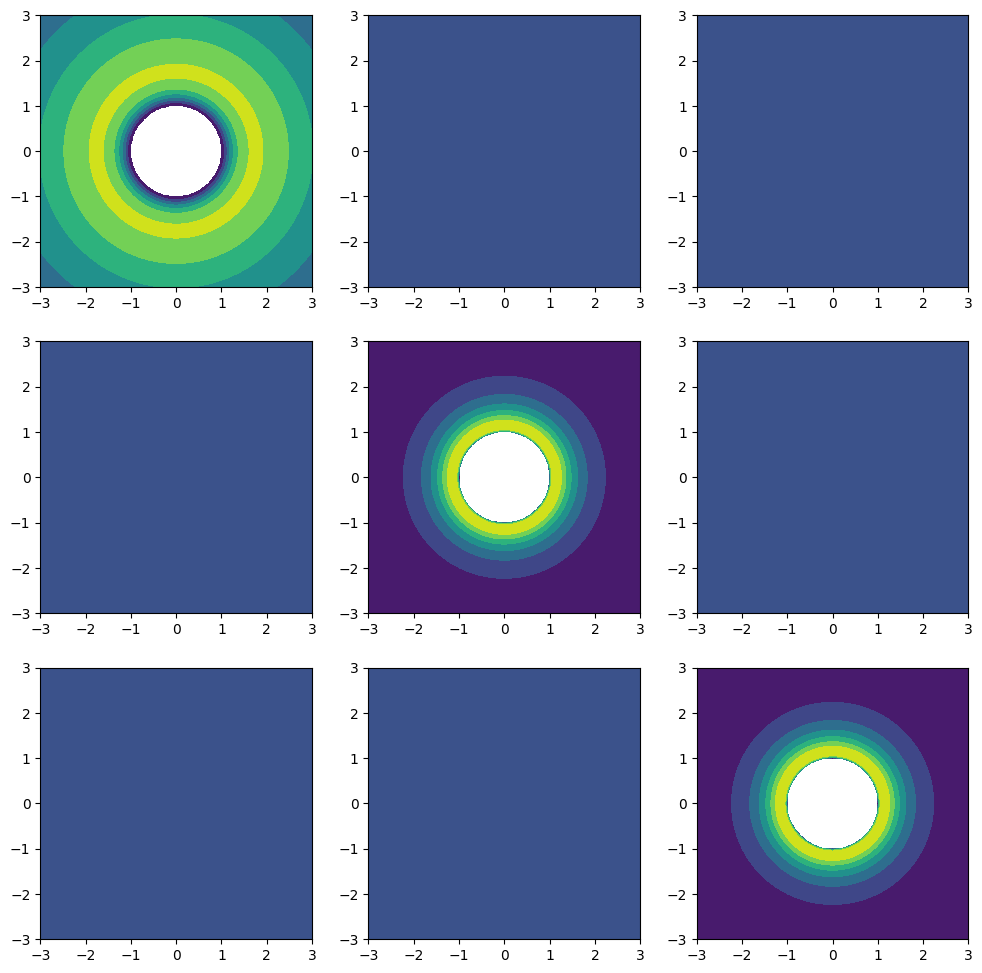

In [14]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,12))

for i in range(9):
    ax = fig.add_subplot(3,3,i+1)
    ax.set_aspect('equal')
    ax.contourf(xg, yg, E_comps[i])

In [15]:
vector1 = sp.Matrix([[r_cart, theta_cart, phi_cart]])
vector2 = sp.Matrix([[x],[y],[z]])

J = vector1.jacobian(vector2)
J

Matrix([
[                                            x/sqrt(x**2 + y**2 + z**2),                                             y/sqrt(x**2 + y**2 + z**2),                                                                             z/sqrt(x**2 + y**2 + z**2)],
[x*z/(sqrt(-z**2/(x**2 + y**2 + z**2) + 1)*(x**2 + y**2 + z**2)**(3/2)), y*z/(sqrt(-z**2/(x**2 + y**2 + z**2) + 1)*(x**2 + y**2 + z**2)**(3/2)), -(-z**2/(x**2 + y**2 + z**2)**(3/2) + 1/sqrt(x**2 + y**2 + z**2))/sqrt(-z**2/(x**2 + y**2 + z**2) + 1)],
[                                             -y/(x**2*(1 + y**2/x**2)),                                                  1/(x*(1 + y**2/x**2)),                                                                                                      0]])

In [16]:
gij_sph_xyz = gij_sph.subs(r,r_cart)
gij_sph_xyz = sp.simplify(gij_sph_xyz.subs(theta,theta_cart))
gij_sph_xyz

Matrix([
[sqrt(x**2 + y**2 + z**2)/(sqrt(x**2 + y**2 + z**2) - 1),                  0,                                                       0],
[                                                      0, x**2 + y**2 + z**2,                                                       0],
[                                                      0,                  0, sqrt(x**4 + 2*x**2*y**2 + x**2*z**2 + y**4 + y**2*z**2)]])**(-1)

In [17]:
gij_cart = sp.simplify(sp.Transpose(J)*gij_sph_xyz*J)

In [18]:
gij_cart

Matrix([
[                   x**2*y**2/((x**2 + y**2)**3*sqrt(x**4 + 2*x**2*y**2 + x**2*z**2 + y**4 + y**2*z**2)) + x**2*z**2/((x**2 + y**2)*(x**2 + y**2 + z**2)**3) + x**2/(x**2 + y**2 + z**2) - x**2/(x**2 + y**2 + z**2)**(3/2) + y**4/((x**2 + y**2)**3*sqrt(x**4 + 2*x**2*y**2 + x**2*z**2 + y**4 + y**2*z**2)), x**3*y/((-x**2 - y**2)**3*sqrt(x**4 + 2*x**2*y**2 + x**2*z**2 + y**4 + y**2*z**2)) + x*y**3/((-x**2 - y**2)**3*sqrt(x**4 + 2*x**2*y**2 + x**2*z**2 + y**4 + y**2*z**2)) - x*y*z**2*(x**2 + y**2)**2/((-x**2 - y**2)**3*(x**2 + y**2 + z**2)**3) + x*y/(x**2 + y**2 + z**2) - x*y/(x**2 + y**2 + z**2)**(3/2),                                   x*z/(x**2 + y**2 + z**2) - x*z/(x**2 + y**2 + z**2)**3 - x*z/(x**2 + y**2 + z**2)**(3/2)],
[x**3*y/((-x**2 - y**2)**3*sqrt(x**4 + 2*x**2*y**2 + x**2*z**2 + y**4 + y**2*z**2)) + x*y**3/((-x**2 - y**2)**3*sqrt(x**4 + 2*x**2*y**2 + x**2*z**2 + y**4 + y**2*z**2)) - x*y*z**2*(x**2 + y**2)**2/((-x**2 - y**2)**3*(x**2 + y**2 + z**2)**3) + x*y/(x**2 + y**2 +

In [19]:
gij_cart = sp.simplify(sp.cancel(gij_cart))
gij_cart

Matrix([
[(-x**10*sqrt(x**4 + 2*x**2*y**2 + x**2*z**2 + y**4 + y**2*z**2) + x**10*sqrt(x**6 + 3*x**4*y**2 + 2*x**4*z**2 + 3*x**2*y**4 + 4*x**2*y**2*z**2 + x**2*z**4 + y**6 + 2*y**4*z**2 + y**2*z**4) - 4*x**8*y**2*sqrt(x**4 + 2*x**2*y**2 + x**2*z**2 + y**4 + y**2*z**2) + 4*x**8*y**2*sqrt(x**6 + 3*x**4*y**2 + 2*x**4*z**2 + 3*x**2*y**4 + 4*x**2*y**2*z**2 + x**2*z**4 + y**6 + 2*y**4*z**2 + y**2*z**4) - 2*x**8*z**2*sqrt(x**4 + 2*x**2*y**2 + x**2*z**2 + y**4 + y**2*z**2) + 2*x**8*z**2*sqrt(x**6 + 3*x**4*y**2 + 2*x**4*z**2 + 3*x**2*y**4 + 4*x**2*y**2*z**2 + x**2*z**4 + y**6 + 2*y**4*z**2 + y**2*z**4) - 6*x**6*y**4*sqrt(x**4 + 2*x**2*y**2 + x**2*z**2 + y**4 + y**2*z**2) + 6*x**6*y**4*sqrt(x**6 + 3*x**4*y**2 + 2*x**4*z**2 + 3*x**2*y**4 + 4*x**2*y**2*z**2 + x**2*z**4 + y**6 + 2*y**4*z**2 + y**2*z**4) - 6*x**6*y**2*z**2*sqrt(x**4 + 2*x**2*y**2 + x**2*z**2 + y**4 + y**2*z**2) + 6*x**6*y**2*z**2*sqrt(x**6 + 3*x**4*y**2 + 2*x**4*z**2 + 3*x**2*y**4 + 4*x**2*y**2*z**2 + x**2*z**4 + y**6 + 2*y**4*z**2 

In [20]:
gij_cart_00 = sp.collect(gij_cart[0,0],z)
gij_cart_00 = sp.powsimp(gij_cart[0,0])
gij_cart_00

(-x**10*sqrt(x**4 + 2*x**2*y**2 + x**2*z**2 + y**4 + y**2*z**2) + x**10*sqrt(x**6 + 3*x**4*y**2 + 2*x**4*z**2 + 3*x**2*y**4 + 4*x**2*y**2*z**2 + x**2*z**4 + y**6 + 2*y**4*z**2 + y**2*z**4) - 4*x**8*y**2*sqrt(x**4 + 2*x**2*y**2 + x**2*z**2 + y**4 + y**2*z**2) + 4*x**8*y**2*sqrt(x**6 + 3*x**4*y**2 + 2*x**4*z**2 + 3*x**2*y**4 + 4*x**2*y**2*z**2 + x**2*z**4 + y**6 + 2*y**4*z**2 + y**2*z**4) - 2*x**8*z**2*sqrt(x**4 + 2*x**2*y**2 + x**2*z**2 + y**4 + y**2*z**2) + 2*x**8*z**2*sqrt(x**6 + 3*x**4*y**2 + 2*x**4*z**2 + 3*x**2*y**4 + 4*x**2*y**2*z**2 + x**2*z**4 + y**6 + 2*y**4*z**2 + y**2*z**4) - 6*x**6*y**4*sqrt(x**4 + 2*x**2*y**2 + x**2*z**2 + y**4 + y**2*z**2) + 6*x**6*y**4*sqrt(x**6 + 3*x**4*y**2 + 2*x**4*z**2 + 3*x**2*y**4 + 4*x**2*y**2*z**2 + x**2*z**4 + y**6 + 2*y**4*z**2 + y**2*z**4) - 6*x**6*y**2*z**2*sqrt(x**4 + 2*x**2*y**2 + x**2*z**2 + y**4 + y**2*z**2) + 6*x**6*y**2*z**2*sqrt(x**6 + 3*x**4*y**2 + 2*x**4*z**2 + 3*x**2*y**4 + 4*x**2*y**2*z**2 + x**2*z**4 + y**6 + 2*y**4*z**2 + y**2*z**

In [21]:
A = sp.Matrix(3, 3, sp.symbols('A:3:3'))
A

Matrix([
[A00, A01, A02],
[A10, A11, A12],
[A20, A21, A22]])

In [22]:
A.det()

A00*A11*A22 - A00*A12*A21 - A01*A10*A22 + A01*A12*A20 + A02*A10*A21 - A02*A11*A20

In [23]:
det_gij_cart = A.det().subs(zip(list(A), list(gij_cart)))
det_gij_cart

2*x**2*y**2*z**2*(x**4*sqrt(x**2 + y**2 + z**2) - x**4 + 2*x**2*y**2*sqrt(x**2 + y**2 + z**2) - 2*x**2*y**2 + 2*x**2*z**2*sqrt(x**2 + y**2 + z**2) - 2*x**2*z**2 + y**4*sqrt(x**2 + y**2 + z**2) - y**4 + 2*y**2*z**2*sqrt(x**2 + y**2 + z**2) - 2*y**2*z**2 + z**4*sqrt(x**2 + y**2 + z**2) - z**4 - sqrt(x**2 + y**2 + z**2))**2*(-x**8*sqrt(x**4 + 2*x**2*y**2 + x**2*z**2 + y**4 + y**2*z**2) + x**8*sqrt(x**6 + 3*x**4*y**2 + 2*x**4*z**2 + 3*x**2*y**4 + 4*x**2*y**2*z**2 + x**2*z**4 + y**6 + 2*y**4*z**2 + y**2*z**4) - 4*x**6*y**2*sqrt(x**4 + 2*x**2*y**2 + x**2*z**2 + y**4 + y**2*z**2) + 4*x**6*y**2*sqrt(x**6 + 3*x**4*y**2 + 2*x**4*z**2 + 3*x**2*y**4 + 4*x**2*y**2*z**2 + x**2*z**4 + y**6 + 2*y**4*z**2 + y**2*z**4) - 2*x**6*z**2*sqrt(x**4 + 2*x**2*y**2 + x**2*z**2 + y**4 + y**2*z**2) + 2*x**6*z**2*sqrt(x**6 + 3*x**4*y**2 + 2*x**4*z**2 + 3*x**2*y**4 + 4*x**2*y**2*z**2 + x**2*z**4 + y**6 + 2*y**4*z**2 + y**2*z**4) - x**6*sqrt(x**2 + y**2 + z**2) - 6*x**4*y**4*sqrt(x**4 + 2*x**2*y**2 + x**2*z**2 + y**4

In [24]:
det_gij_cart = sp.simplify(sp.cancel(det_gij_cart))

In [25]:
det_gij_cart

(-x**14*z**2*sqrt(x**2 + y**2 + z**2) + x**14*z**2 - 7*x**12*y**2*z**2*sqrt(x**2 + y**2 + z**2) + 7*x**12*y**2*z**2 - 5*x**12*z**4*sqrt(x**2 + y**2 + z**2) + 5*x**12*z**4 - x**12 - 21*x**10*y**4*z**2*sqrt(x**2 + y**2 + z**2) + 21*x**10*y**4*z**2 - 30*x**10*y**2*z**4*sqrt(x**2 + y**2 + z**2) + 30*x**10*y**2*z**4 - 6*x**10*y**2 - 10*x**10*z**6*sqrt(x**2 + y**2 + z**2) + 10*x**10*z**6 + 2*x**10*z**2*sqrt(x**2 + y**2 + z**2) + x**10*z**2*sqrt(x**10 + 5*x**8*y**2 + 3*x**8*z**2 + 10*x**6*y**4 + 12*x**6*y**2*z**2 + 3*x**6*z**4 + 10*x**4*y**6 + 18*x**4*y**4*z**2 + 9*x**4*y**2*z**4 + x**4*z**6 + 5*x**2*y**8 + 12*x**2*y**6*z**2 + 9*x**2*y**4*z**4 + 2*x**2*y**2*z**6 + y**10 + 3*y**8*z**2 + 3*y**6*z**4 + y**4*z**6) - 5*x**10*z**2 - 35*x**8*y**6*z**2*sqrt(x**2 + y**2 + z**2) + 35*x**8*y**6*z**2 - 75*x**8*y**4*z**4*sqrt(x**2 + y**2 + z**2) + 75*x**8*y**4*z**4 - 15*x**8*y**4 - 50*x**8*y**2*z**6*sqrt(x**2 + y**2 + z**2) + 50*x**8*y**2*z**6 + 10*x**8*y**2*z**2*sqrt(x**2 + y**2 + z**2) + 5*x**8*y**2*z**

In [26]:
det_gij_cart_sqrt = sp.simplify(sp.sqrt(det_gij_cart))

In [27]:
det_gij_cart_sqrt

sqrt(-x**14*z**2*sqrt(x**2 + y**2 + z**2) + x**14*z**2 - 7*x**12*y**2*z**2*sqrt(x**2 + y**2 + z**2) + 7*x**12*y**2*z**2 - 5*x**12*z**4*sqrt(x**2 + y**2 + z**2) + 5*x**12*z**4 - x**12 - 21*x**10*y**4*z**2*sqrt(x**2 + y**2 + z**2) + 21*x**10*y**4*z**2 - 30*x**10*y**2*z**4*sqrt(x**2 + y**2 + z**2) + 30*x**10*y**2*z**4 - 6*x**10*y**2 - 10*x**10*z**6*sqrt(x**2 + y**2 + z**2) + 10*x**10*z**6 + 2*x**10*z**2*sqrt(x**2 + y**2 + z**2) + x**10*z**2*sqrt(x**10 + 5*x**8*y**2 + 3*x**8*z**2 + 10*x**6*y**4 + 12*x**6*y**2*z**2 + 3*x**6*z**4 + 10*x**4*y**6 + 18*x**4*y**4*z**2 + 9*x**4*y**2*z**4 + x**4*z**6 + 5*x**2*y**8 + 12*x**2*y**6*z**2 + 9*x**2*y**4*z**4 + 2*x**2*y**2*z**6 + y**10 + 3*y**8*z**2 + 3*y**6*z**4 + y**4*z**6) - 5*x**10*z**2 - 35*x**8*y**6*z**2*sqrt(x**2 + y**2 + z**2) + 35*x**8*y**6*z**2 - 75*x**8*y**4*z**4*sqrt(x**2 + y**2 + z**2) + 75*x**8*y**4*z**4 - 15*x**8*y**4 - 50*x**8*y**2*z**6*sqrt(x**2 + y**2 + z**2) + 50*x**8*y**2*z**6 + 10*x**8*y**2*z**2*sqrt(x**2 + y**2 + z**2) + 5*x**8*y**2